In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("gdrive/MyDrive/Yin/landscape")

Mounted at /content/gdrive


In [ ]:
!pip install pyshp

In [ ]:
!git clone https://github.com/VeryLargeGraph/TSCAN.git
!cd tSCAN
!pip install networkx
!pip install click

In [ ]:
def get_dict():
	# mFile = open("analysis/data/forest_landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	mFile = open("analysis/data/ecosystem_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/ecological_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')

	next(mFile)
	countries = {}
	for ele in mFile:
		data = ele.rstrip().split('\t')
		country = data[-3]
		coord = data[-2]
		author = data[-33]
		if author in countries:
			pass
		else:
			countries[author] = [country,coord]
	return countries

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos



In [ ]:
!pip install netgraph

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.7 MB/s eta 0:00:00


In [ ]:
# from community import community_louvain
# import networkx as nx
# # Import libraries
# import pandas as pd #For reading dataset files
# import networkx as nx #For network creation/analysis
# from networkx.algorithms import community
# import community as community_louvain
# import matplotlib.pyplot as plt #For plotting graphs
# import igraph as ig
# import networkx.algorithms.community as nxcom

# G = nx.Graph()
# # G = nx.DiGraph()


# df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
# df['retweeted_username'].replace('', np.nan, inplace=True)
# df.dropna(subset=['retweeted_username'], inplace=True)
# df['entities.mentions'].replace('', np.nan, inplace=True)
# df.dropna(subset=['entities.mentions'], inplace=True)
# df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# # print(df.head())
# xx = get_dict()
# for index, row in df.iterrows():
#   orgNode = row["retweeted_username"]
#   if orgNode in G.nodes():
#     pass
#   else:
#     if orgNode in xx:
#       G.add_node(orgNode, country = xx[orgNode])
#       # G.add_node(orgNode)
#   data = row["entities.mentions"]
#   for ele in data:
#     destNode = str(ele).replace("@", "")
#     if destNode in G.nodes():
#       G.add_edge(orgNode, destNode)
#     else:
#       if destNode in xx:
#         # G.add_node(destNode)
#         G.add_node(destNode, country = xx[destNode])
#         G.add_edge(orgNode,destNode)
# print(G.edges())
#     # print(row["retweeted_username"], row["entities.mentions"])
# remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
# G.remove_nodes_from(remove)
# G.remove_edges_from(nx.selfloop_edges(G))

# communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# # pos=nx.spring_layout(G)
# # nx.draw(G,pos)
# # # labels = nx.get_edge_attributes(G,'weight')
# # # nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# # # nx.draw_networkx_edge_labels(G,pos)

# # pos = nx.spring_layout(G, k=0.1)
# # plt.rcParams.update({'figure.figsize': (15, 10)})
# # nx.draw_networkx(G, pos=pos, node_size=0, edge_color="#444444", alpha=0.05, with_labels=False)

# # colors = ["#00C98D", "#5030C0", "#50F0F0"]
# # pos = nx.spring_layout(G)
# # lst_b = community.greedy_modularity_communities(G)
# # color_map_b = {}
# # keys = G.nodes()
# # values = "black"
# # for i in keys:
# #         color_map_b[i] = values
# # counter = 0
# # for x in lst_b:
# #   for n in x:
# #     color_map_b[n] = colors[counter]
# #   counter = counter + 1

# # nx.draw_networkx_edges(G, pos)
# # nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
# # nx.draw_networkx_labels(G, pos)
# # plt.axis("off")
# # plt.show()


<ipython-input-9-1f392c3b3483>:16: DtypeWarning: Columns (29,31,32,33,39,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')


[('ICRAF', 'CIFOR'), ('ICRAF', 'YIL_Initiative'), ('ICRAF', 'GovernorMwadime'), ('ICRAF', 'TaitaTaveta006'), ('ICRAF', 'UKinKenya'), ('ICRAF', 'Environment_Ke'), ('ICRAF', 'WangariCM'), ('ICRAF', 'IlianaMonterros'), ('ICRAF', 'FTA_Partnership'), ('ICRAF', 'marynjeng'), ('ICRAF', 'UNCCDLibrary'), ('ICRAF', 'ManuelGuarigua1'), ('ICRAF', 'Yale_ELTI'), ('ICRAF', 'DENROfficial'), ('ICRAF', 'AfriClimatConvo'), ('ICRAF', 'DrylandsTransf1'), ('ICRAF', 'lawinowiecki'), ('ICRAF', 'Focali_se'), ('ICRAF', 'EvergreeningA'), ('ICRAF', 'RegreenAfrica'), ('ICRAF', 'andyheald'), ('ICRAF', 'GlobalLF'), ('ICRAF', 'EltsonF'), ('ICRAF', 'VickiWangui'), ('ICRAF', 'GPFLRtweets'), ('ICRAF', 'SundayGeofrey5'), ('ICRAF', 'GlobalLF_Esp'), ('ICRAF', 'CIFOR_bosques'), ('ICRAF', 'UNBiodiversity'), ('ICRAF', 'FAOForestry'), ('ICRAF', 'WWFLeadForests'), ('ICRAF', 'IUCN'), ('ICRAF', 'IUFRO'), ('ICRAF', 'theGEF'), ('ICRAF', 'KeForestService'), ('ICRAF', 'FAOKenya'), ('ICRAF', 'WorldResources'), ('ICRAF', 'WLE_CGIAR'), 

In [ ]:
# import networkx as nx
# from matplotlib import pyplot as plt
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'figure.figsize': (15, 10)})
# # get reproducible results
# import networkx.algorithms.community as nxcom

# import random
# from numpy import random as nprand
# random.seed(123)
# nprand.seed(123)

# G = nx.Graph()
# # G = nx.DiGraph()


# # df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/landscape_restoration_country_tab.tsv", sep ='\t')
# # df = pd.read_csv("analysis/data/ecosystem_restoration_country_tab.tsv", sep ='\t')
# # df = pd.read_csv("analysis/data/ecological_restoration_country_tab.tsv", sep ='\t')

# df['retweeted_username'].replace('', np.nan, inplace=True)
# df.dropna(subset=['retweeted_username'], inplace=True)
# df['entities.mentions'].replace('', np.nan, inplace=True)
# df.dropna(subset=['entities.mentions'], inplace=True)
# df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# # print(df.head())
# countries = get_dict()
# for index, row in df.iterrows():
#   orgNode = row["retweeted_username"]
#   mcoord = row["coord"]
#   mym = row["year_month"]
#   myear = row["year"]
#   if orgNode in G.nodes():
#     nx.set_node_attributes(G, { orgNode:{'coord': mcoord, 'ym':mym, 'year': myear}})
#   else:
#     #'person1', name='John Doe', age=40
#     G.add_node(orgNode, coord = mcoord, ym = mym, year = myear)
#   data = row["entities.mentions"]
#   for ele in data:
#     destNode = str(ele).replace("@", "")
#     if destNode in G.nodes():
#       G.add_edge(orgNode, destNode)
#     else:
#       G.add_node(destNode, ym = mym, year = myear)
#       G.add_edge(orgNode,destNode)
# print(G.edges())
#     # print(row["retweeted_username"], row["entities.mentions"])
# remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
# G.remove_nodes_from(remove)
# G.remove_edges_from(nx.selfloop_edges(G))

# communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
#     # Count the communities
# print(f"The karate club has {len(communities)} communities.")
# # for ele in communities:
# #   print(len(ele))


<ipython-input-29-e5a5ba778191>:17: DtypeWarning: Columns (29,31,32,33,39,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')


[('ICRAF', 'CIFOR'), ('ICRAF', 'YIL_Initiative'), ('ICRAF', 'GovernorMwadime'), ('ICRAF', 'TaitaTaveta006'), ('ICRAF', 'UKinKenya'), ('ICRAF', 'Environment_Ke'), ('ICRAF', 'FTA_Partnership'), ('ICRAF', 'WangariCw'), ('ICRAF', 'BourneMieke'), ('ICRAF', 'Njoki_Carol83'), ('ICRAF', 'WangariCM'), ('ICRAF', 'IlianaMonterros'), ('ICRAF', 'marynjeng'), ('ICRAF', 'UNCCDLibrary'), ('ICRAF', 'ManuelGuarigua1'), ('ICRAF', 'Yale_ELTI'), ('ICRAF', 'DENROfficial'), ('ICRAF', 'AfriClimatConvo'), ('ICRAF', 'DrylandsTransf1'), ('ICRAF', 'lawinowiecki'), ('ICRAF', 'Focali_se'), ('ICRAF', 'EvergreeningA'), ('ICRAF', 'RegreenAfrica'), ('ICRAF', 'andyheald'), ('ICRAF', 'GlobalLF'), ('ICRAF', 'EltsonF'), ('ICRAF', 'VickiWangui'), ('ICRAF', 'GPFLRtweets'), ('ICRAF', 'SundayGeofrey5'), ('ICRAF', 'GlobalLF_Esp'), ('ICRAF', 'CIFOR_bosques'), ('ICRAF', 'CITES'), ('ICRAF', 'UNBiodiversity'), ('ICRAF', 'FAOForestry'), ('ICRAF', 'WWFLeadForests'), ('ICRAF', 'IUCN'), ('ICRAF', 'WorldBank'), ('ICRAF', 'IUFRO'), ('ICR

In [ ]:
def set_node_community(G, communities):
  for c, v_c in enumerate(communities):
    for v in v_c:
      G.nodes[v]['community'] = c + 1
def set_edge_community(G):
  for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
      G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
      G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
  r0, g0, b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)
  return (r, g, b)

In [ ]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
# external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 6]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] < 7]

internal_color = ['black' for e in internal]

In [ ]:
###This is the code that restrict nodes with country informaiton only
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import networkx.algorithms.community as nxcom

import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

G = nx.Graph()
# G = nx.DiGraph()


# df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/landscape_restoration_country_tab.tsv", sep ='\t')
df = pd.read_csv("analysis/data/ecosystem_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/ecological_restoration_country_tab.tsv", sep ='\t')

df['retweeted_username'].replace('', np.nan, inplace=True)
df.dropna(subset=['retweeted_username'], inplace=True)
df['entities.mentions'].replace('', np.nan, inplace=True)
df.dropna(subset=['entities.mentions'], inplace=True)
df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# print(df.head())
countries = get_dict()
for index, row in df.iterrows():
  orgNode = row["retweeted_username"]
  mcoord = row["coord"]
  mym = row["year_month"]
  myear = row["year"]
  if orgNode in countries:
    if orgNode in G.nodes():
      nx.set_node_attributes(G, { orgNode:{'coord': mcoord, 'ym':mym, 'year': myear, 'country':countries[orgNode]}})
    else:
      #'person1', name='John Doe', age=40
      G.add_node(orgNode, coord = mcoord, ym = mym, year = myear, country = countries[orgNode])
  else:
    pass
  data = row["entities.mentions"]
  for ele in data:
    destNode = str(ele).replace("@", "")
    if destNode in countries:
      if destNode in G.nodes():
        nx.set_node_attributes(G, { destNode:{'coord': countries[destNode][1], 'ym':mym, 'year': myear, 'country':countries[destNode]}})
        G.add_edge(orgNode, destNode)
      else:
        G.add_node(destNode, ym = mym, year = myear, country = countries[destNode], coord = countries[destNode][1])
        G.add_edge(orgNode,destNode)
print(G.edges())
    # print(row["retweeted_username"], row["entities.mentions"])
remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
G.remove_nodes_from(remove)
G.remove_edges_from(nx.selfloop_edges(G))

communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
    # Count the communities
print(f"The graph has {len(communities)} communities.")
# for ele in communities:
#   print(len(ele))

print("Number of communities:", len(communities))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# print("Network diameter:", nx.diameter(G))
# print("Average degree:", nx.average_degree_connectivity(G))
print("Average clustering coefficient :", nx.average_clustering(G))
print("network local efficiency", nx.local_efficiency(G))
print("network global efficiency", nx.global_efficiency(G))
print("small-world coefficient (omega)", nx.omega(G))
print("small-world coefficient (sigma)", nx.sigma(G, niter=10))
# rc = nx.rich_club_coefficient(G, normalized=False, seed=42)


In [ ]:
# ## Create shapefile for each node with community information
# import shapefile
# # w = shapefile.Writer('shp/forest_landscape', shapefile.POINT)
# # w = shapefile.Writer('shp/landscape', shapefile.POINT)
# w = shapefile.Writer('shp/ecosystem', shapefile.POINT)

# w.field('name', 'C')
# w.field('country', 'C')
# w.field('community','N',decimal=0)
# for index, community in enumerate(communities):
#   # print(community)
#   for ele in community:
#     if 'country' in G.nodes[ele]:
#       # print(ele)
#       country = G.nodes[ele]['country']
#       latlng = country[1].split(",")
#       mCountry = country[0]
#       w.point(float(latlng[0]), float(latlng[1]))
#       # w.record()
#       w.record(name=ele, community=index, country = mCountry)
# w.close()


import shapefile
# w = shapefile.Writer('shp/line/forest_landscape', shapefile.POLYLINE)
# w = shapefile.Writer('shp/line/landscape', shapefile.POLYLINE)
# w = shapefile.Writer('shp/line/ecosystem', shapefile.POLYLINE)
w = shapefile.Writer('shp/line/ecological', shapefile.POLYLINE)

w.field('name', 'C')
w.field('community','N', decimal=0)
for index, community in enumerate(communities):
    for ele in community:
        if 'country' in G.nodes[ele]:
          lines = []
          country = G.nodes[ele]['country']
          latlng = country[1].split(",")
          lines.append([float(latlng[0]), float(latlng[1])])
          mCountry = country[0]
          ww = G.nodes[ele]
          dests = G.edges(ele)
          for xx in dests:
            dest = xx[1]
            if 'coord' in G.nodes[dest]:
              # print(G.nodes[dest])
              country2 = G.nodes[dest]['country']
              latlng2 = country2[1].split(",")
              lines.append([float(latlng2[0]), float(latlng2[1])])
              w.line([lines])
              w.record(name=ele, community=index)
w.close()







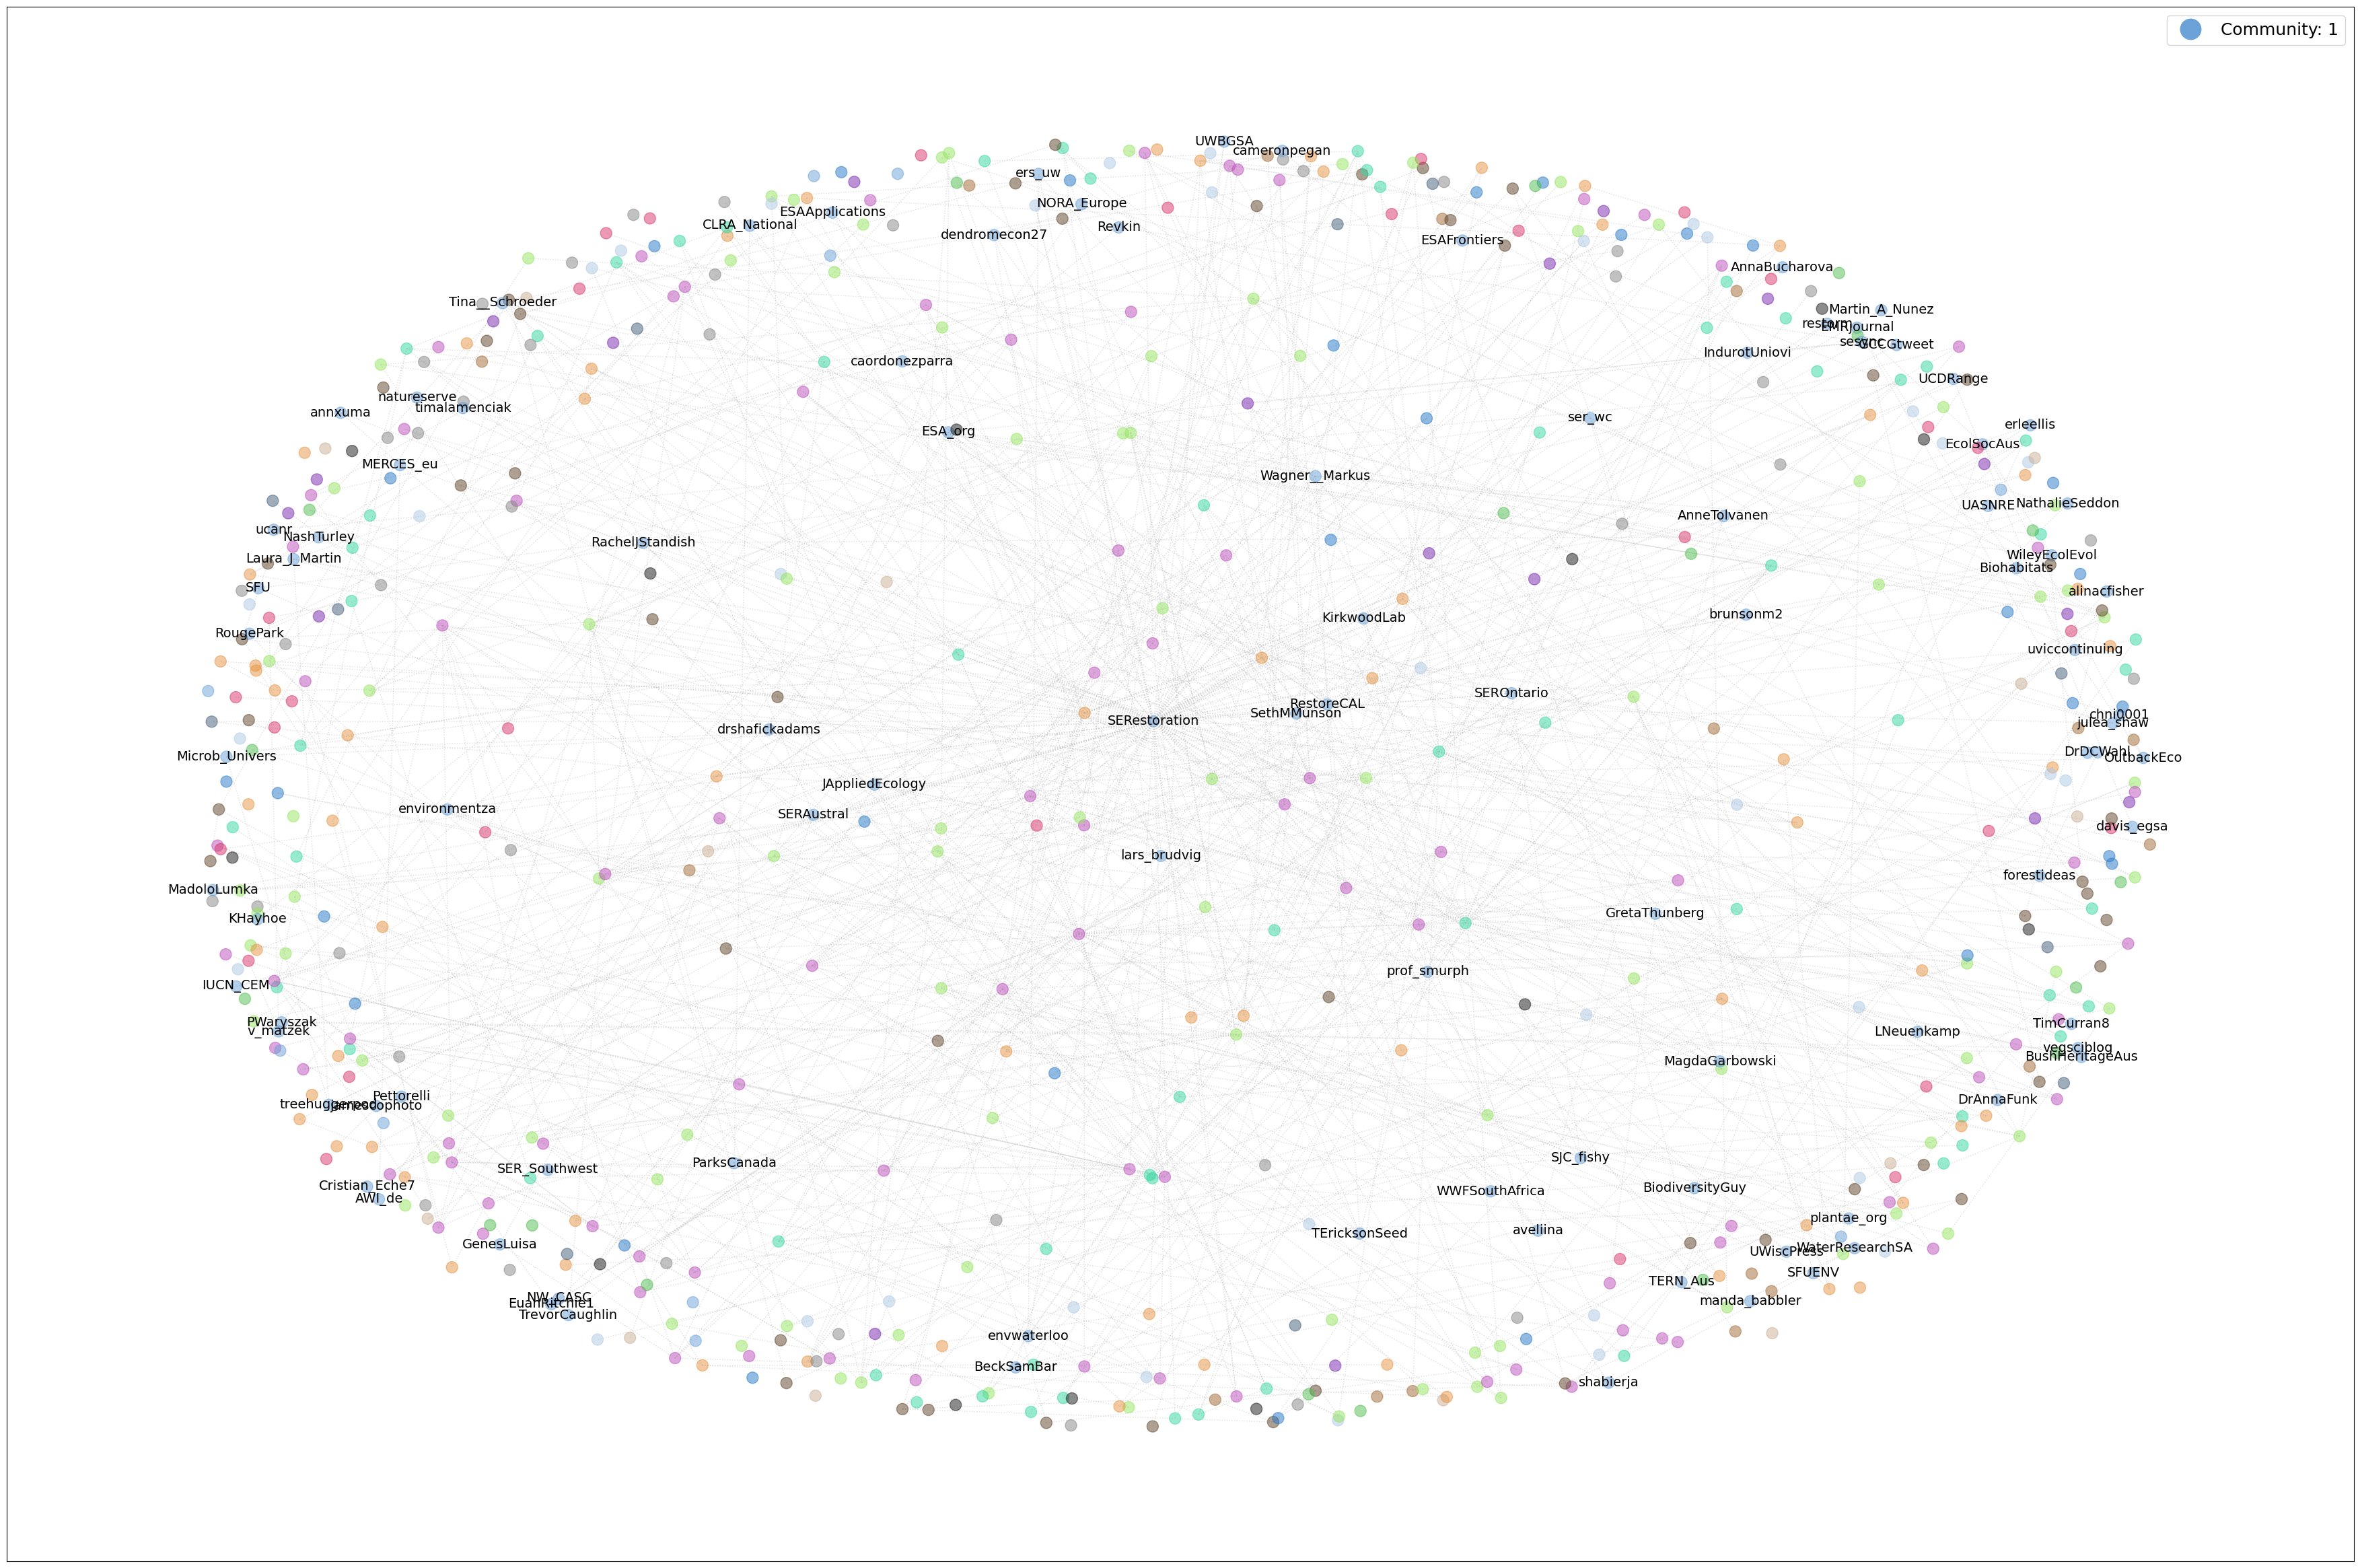

In [ ]:
from matplotlib.lines import Line2D
karate_pos = nx.spring_layout(G, k=.75)
plt.rcParams.update({'figure.figsize': (45, 30)})

legend_elements=[]
labels = {}
xx_color =[]
for node in G.nodes():
  if G.nodes[node]['community'] < 2:
    labels[node] = node
    # print(G.nodes[node]['community'])
    # print(G.nodes[node]['community'])

# for ele in [1,2,3,4,5]:
for ele in [1]:
  xx_color = get_color(ele)
  legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Community: ' + str(ele), markerfacecolor = xx_color, markersize=24))
    # Draw external edges
# nx.draw_networkx(
#         G,
#         pos=karate_pos,
#         with_labels=False,
#         node_color=node_color,
#         # node_size=0,
#         edgelist=external,
#         edge_color="silver",
#         style=":")
# nx.draw_networkx_labels(G, pos=karate_pos, labels=labels, font_size=16, font_color='r')

# #     # Draw nodes and internal edges
nx.draw_networkx(
        G,
        pos=karate_pos,
        node_size=150,
        with_labels=False,
        node_color=node_color,
        edgelist=internal,
        # edge_color=internal_color,
        alpha=0.5,
        edge_color="silver",
        style=":")
nx.draw_networkx_labels(G, pos=karate_pos, labels=labels, font_size=14)
# plt.legend()
plt.legend(handles=legend_elements, loc='upper right', fontsize = 18)
plt.show()

In [ ]:
from community import community_louvain
import networkx as nx
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
import networkx.algorithms.community as nxcom

G = nx.Graph()
# G = nx.DiGraph()

mFile = open("test.txt","w")
df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
df['retweeted_username'].replace('', np.nan, inplace=True)
df.dropna(subset=['retweeted_username'], inplace=True)
df['entities.mentions'].replace('', np.nan, inplace=True)
df.dropna(subset=['entities.mentions'], inplace=True)
df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# print(df.head())
xx = get_dict()
for index, row in df.iterrows():
  orgNode = row["retweeted_username"]
  mym = row["year_month"]
  data = row["entities.mentions"]
  for ele in data:
    destNode = str(ele).replace("@", "")
    mString = orgNode + "\t" + destNode + "\t" + mym + "\n"
    mFile.write(mString)

mFile.close()


<ipython-input-21-ccf2f0f8b12f>:16: DtypeWarning: Columns (29,31,32,33,39,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')


In [ ]:

!python  TSCAN/run.py



In [ ]:
def get_dict():
	# mFile = open("analysis/data/forest_landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/landscape_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	mFile = open("analysis/data/ecosystem_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')
	# mFile = open("analysis/data/ecological_restoration_country_tab.tsv", "r",encoding="cp437", errors='ignore')

	next(mFile)
	countries = {}
	for ele in mFile:
		data = ele.rstrip().split('\t')
		country = data[-3]
		coord = data[-2]
		author = data[-33]
		if author in countries:
			pass
		else:
			countries[author] = [country,coord]
	return countries

In [ ]:
###This is the code that restrict nodes with country informaiton only
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import networkx.algorithms.community as nxcom

import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

G = nx.Graph()
# G = nx.DiGraph()


# df = pd.read_csv("analysis/data/forest_landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/landscape_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/ecosystem_restoration_country_tab.tsv", sep ='\t')
# df = pd.read_csv("analysis/data/ecological_restoration_country_tab.tsv", sep ='\t')

df['retweeted_username'].replace('', np.nan, inplace=True)
df.dropna(subset=['retweeted_username'], inplace=True)
df['entities.mentions'].replace('', np.nan, inplace=True)
df.dropna(subset=['entities.mentions'], inplace=True)
df['entities.mentions'] = df['entities.mentions'].apply(literal_eval)
# print(df.head())
countries = get_dict()
for index, row in df.iterrows():
  orgNode = row["retweeted_username"]
  mcoord = row["coord"]
  mym = row["year_month"]
  myear = row["year"]
  if orgNode in countries:
    if orgNode in G.nodes():
      nx.set_node_attributes(G, { orgNode:{'coord': mcoord, 'ym':mym, 'year': myear, 'country':countries[orgNode]}})
    else:
      #'person1', name='John Doe', age=40
      G.add_node(orgNode, coord = mcoord, ym = mym, year = myear, country = countries[orgNode])
  else:
    pass
  data = row["entities.mentions"]
  for ele in data:
    destNode = str(ele).replace("@", "")
    if destNode in countries:
      if destNode in G.nodes():
        nx.set_node_attributes(G, { destNode:{'coord': countries[destNode][1], 'ym':mym, 'year': myear, 'country':countries[destNode]}})
        G.add_edge(orgNode, destNode)
      else:
        G.add_node(destNode, ym = mym, year = myear, country = countries[destNode], coord = countries[destNode][1])
        G.add_edge(orgNode,destNode)
print(G.edges())
    # print(row["retweeted_username"], row["entities.mentions"])
remove = [node for node,degree in dict(G.degree()).items() if degree < 3]
G.remove_nodes_from(remove)
G.remove_edges_from(nx.selfloop_edges(G))
